In [1]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential,  datasets, models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

##### Load the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

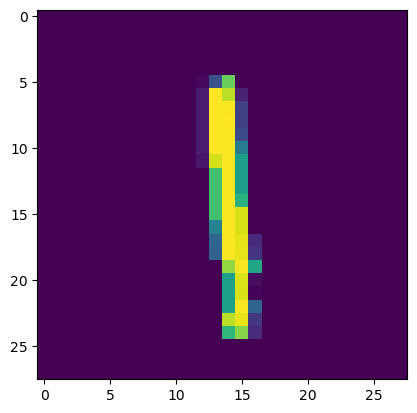

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[8])

###### Normalize the pixel values

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_images[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##### Reshape the images to fit the CNN input requirements

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

##### Build the CNN model

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###### Compile the model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###### Train the model

In [15]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.8867 - loss: 0.3620 - val_accuracy: 0.9855 - val_loss: 0.0510
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9877 - val_loss: 0.0441
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9858 - val_loss: 0.0500
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9840 - val_loss: 0.0531
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9913 - val_loss: 0.0358


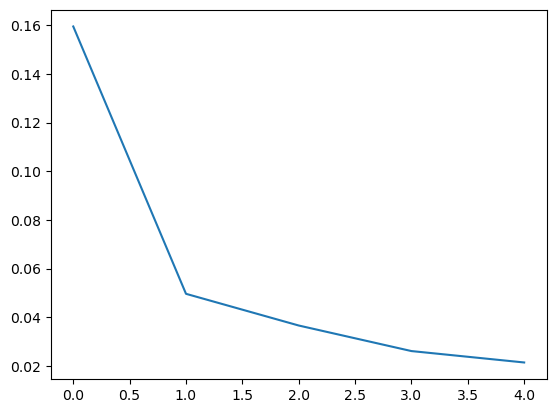

In [16]:
plt.plot(history.history['loss'])

###### Evaluate the model

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9872 - loss: 0.0391
Test accuracy: 0.9915000200271606
Test loss: 0.0276483241468668


In [18]:
y_prob = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

###### Prediction

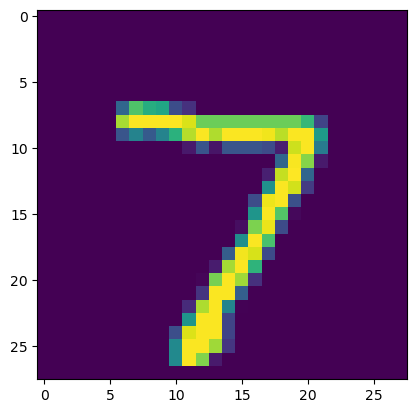

In [20]:
plt.imshow(test_images[0])

In [28]:
# Reshape the specific image to match the input shape expected by the model
specific_test_image = test_images[0].reshape(1, 28, 28, 1)

# Predict the class probabilities for the specific image
prediction = model.predict(specific_test_image)

# Get the predicted class for the specific image
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 7
